In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading data

In [3]:
file_path = "C:\\Users\\User\\Desktop\\datasets\\titanic.csv"
titanic = pd.read_csv(file_path)

In [6]:
print("First few rows of the dataset:", titanic.head())

First few rows of the dataset:    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [7]:
print("\nSummary statistics of the dataset:", titanic.describe())


Summary statistics of the dataset:        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print("\nInformation about the dataset:", titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Information about the dataset: None


In [9]:
# data visualisation

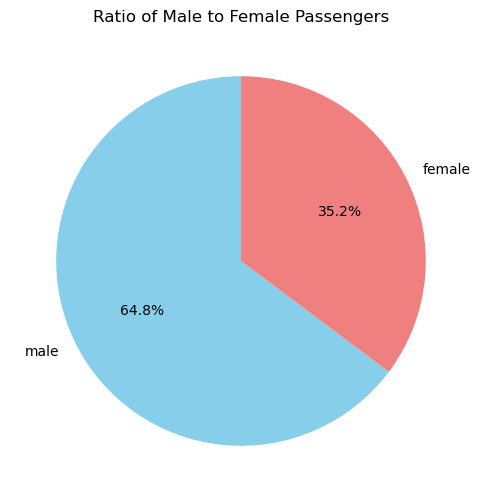

In [13]:
#pie chart

gender_counts = titanic['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Ratio of Male to Female Passengers')
plt.show()

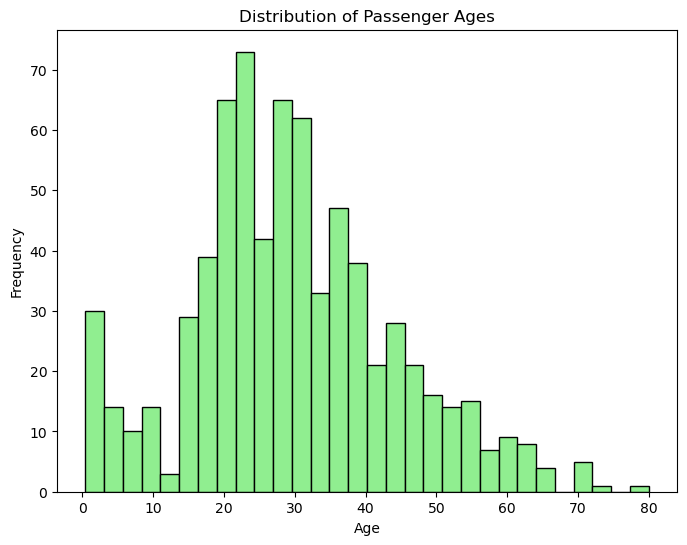

In [14]:
#histogram

plt.figure(figsize=(8, 6))
plt.hist(titanic['Age'].dropna(), bins=30, edgecolor='black', color='lightgreen')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

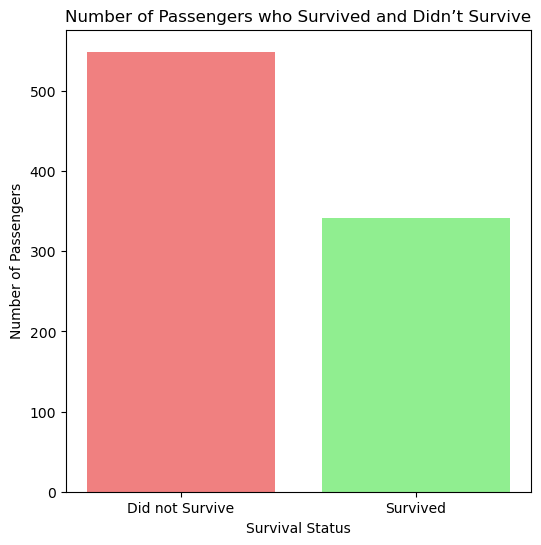

In [17]:
#bar plot 

survival_counts = titanic['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(survival_counts.index, survival_counts, color=['lightcoral', 'lightgreen'])
plt.title('Number of Passengers who Survived and Didn’t Survive')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Did not Survive', 'Survived'])
plt.show()

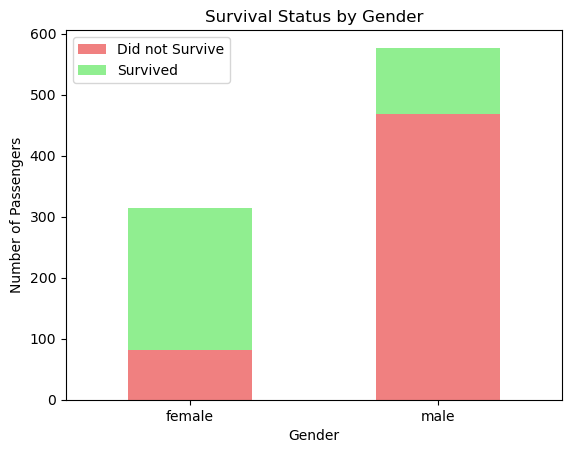

In [18]:
#stacked

gender_survival_counts = titanic.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Survival Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Did not Survive', 'Survived'])
plt.show()

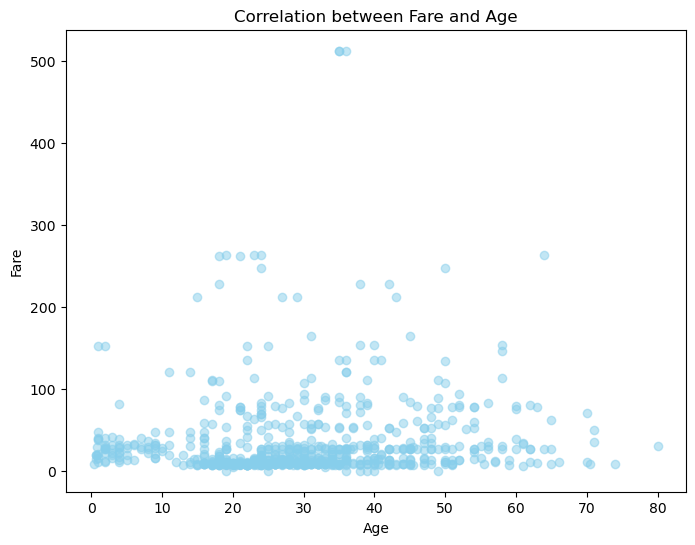

In [20]:
#scatter 

plt.figure(figsize=(8, 6))
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5, color='skyblue')
plt.title('Correlation between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [21]:
# data processing

In [23]:
# Handle missing values in the 'Age' column by replacing them with the mean
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Normalize the 'Fare' column using Min-Max scaling
titanic['Fare'] = (titanic['Fare'] - titanic['Fare'].min()) / (titanic['Fare'].max() - titanic['Fare'].min())

# Convert the 'Sex' column into numerical representation using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

In [24]:
# data analysis

In [26]:
# survival rate for different genders
gender_survival_rate = titanic.groupby('Sex_male')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(gender_survival_rate)

# survival rate for different passenger classes
class_survival_rate = titanic.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(class_survival_rate)

# passenger with the highest fare
passenger_highest_fare = titanic.loc[titanic['Fare'].idxmax()]
print("\nPassenger with the Highest Fare:")
print(passenger_highest_fare[['Name', 'Fare']])



Survival Rate by Gender:
Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Passenger with the Highest Fare:
Name    Ward, Miss. Anna
Fare                 1.0
Name: 258, dtype: object
